In [ ]:
# Import any needed packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests


###Back-of-the-envelope calculations for δ13C concentration in:
### Atmosphere, Biosphere, and *Ocean*
δ13C fluctuates in the Earth system as an indicator of the biosphere’s CO2 photosynthesis and respiration process. I expect to observe the same CO2 El Niño pattern in the δ13C fluctuation, which repeat in annual and interannual cycles. The general expected trend is to lower the atmospheric value of δ13C.

As a beginning, here is a back-of-envelope modeling of the system.





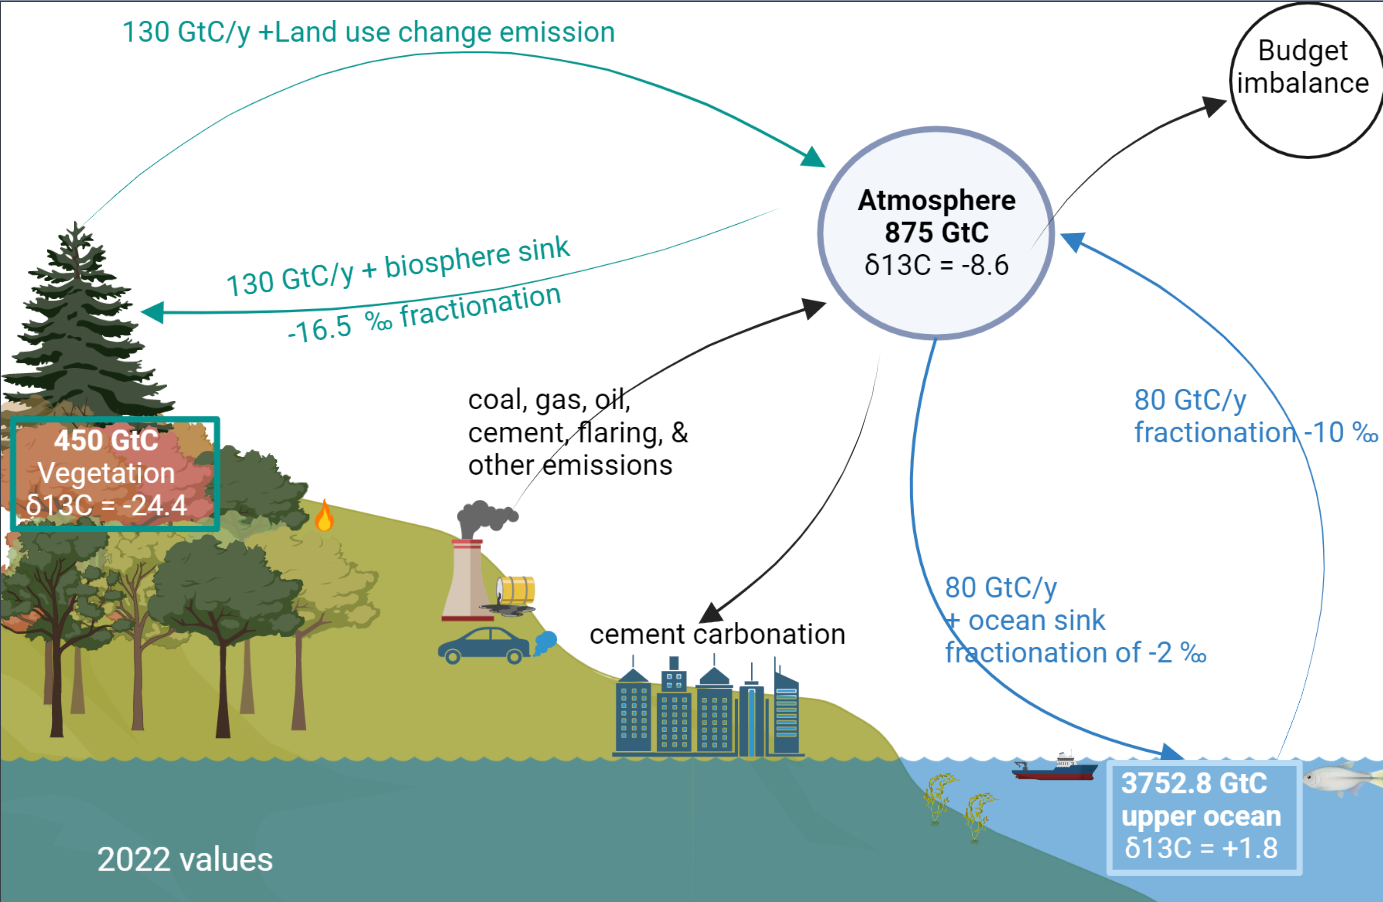

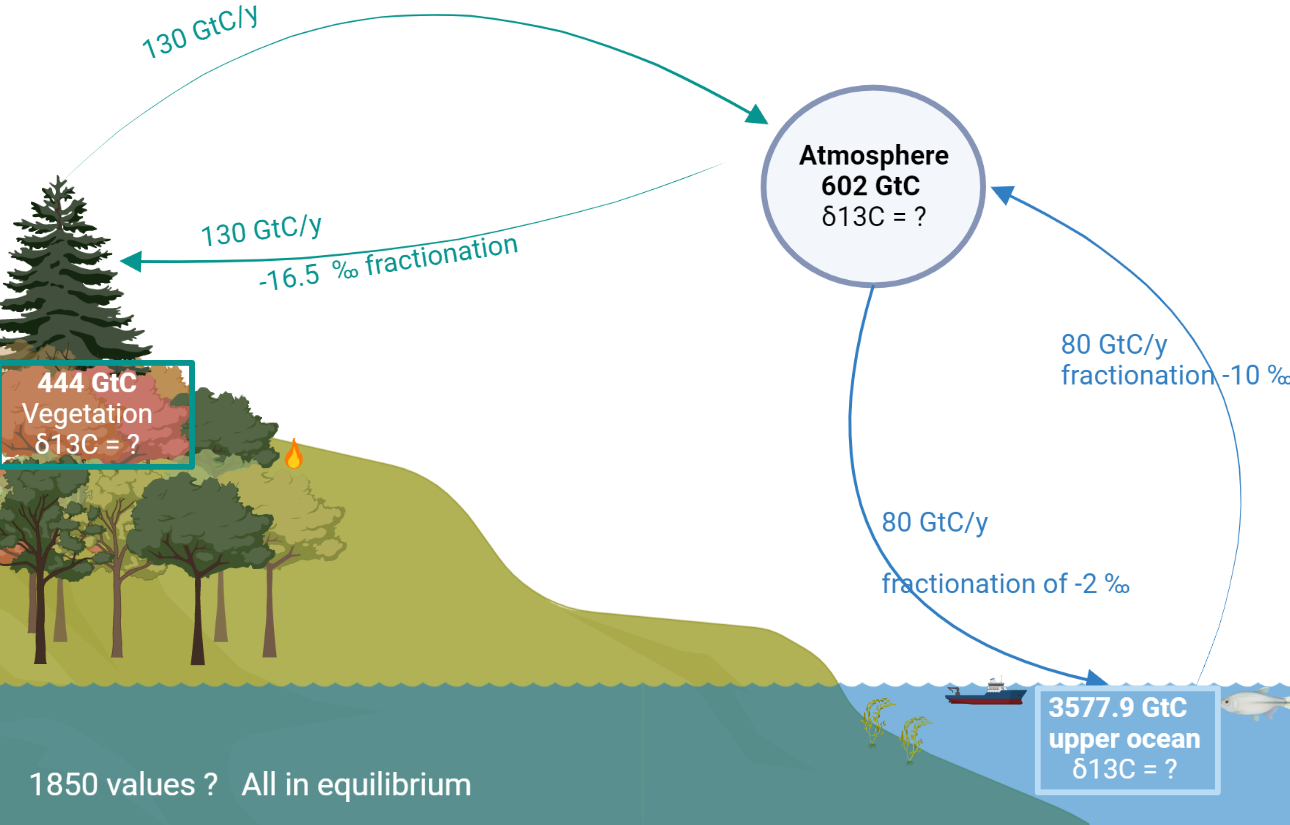


The sketch above is a simplified version of the Global Carbon Budget 2022 paper Friedlingstein et al. 2022. I will use their estimation for the reservoirs & fluxes. In the next code line I will import their data from 1850 till 2021.


In [ ]:

url = "https://data.icos-cp.eu/licence_accept?ids=%5B%221umMtgeUlhS2Y1YW_Qp94bu3%22%5D"  
filename = "Globalcarbon.xlsx"  

response = requests.get(url)

if response.status_code == 200:
    with open(filename, "wb") as f:
        f.write(response.content)
    excel_file = pd.ExcelFile(filename)
    sheet_name = "Global Carbon Budget"

    df1 = pd.read_excel(filename, sheet_name='Historical Budget', 
                       index_col=0, skiprows=range(15),usecols='A,C:H')
    df1 = df1.iloc[-172:]
    df1.columns = ['land_use_change_emission', 'atmospheric_growth',
       'ocean_sink', 'land_sink', 'cement_carbonation_sink',
       'budget_imbalance']
    df1.fillna(value=0, inplace=True)

    df2 = pd.read_excel(filename, sheet_name='Fossil Emissions by Category', 
                       index_col=0, skiprows=range(8),usecols='A,C:H')
    df2.columns = ['coal_emission',
       'oil_emission', 'gas_emission', 'cement_emission', 'flaring_emission',
       'other_emission']
    df2.fillna(value=0, inplace=True)
    df2 = df2 /1000  # convert from MtC to GtC

    # Check point to nullify the fossil fuel only
    #df2 = df2*0  

    #print(df1.head(),df2.head(5)) 
else:
    print("Failed to download", url)

df = pd.concat([df1,df2], axis=1)
time= df.index

# Check point to nullify BOTH : the fossil fuels emission & fluxes
# This checks if the model will reach the equilibrium and when 
# This check could be used to improve begin value if we assume that with 0 fluxes the system must stay in equilibrium
#df = df*0 

#len(df)
#df.plot();plt.show()

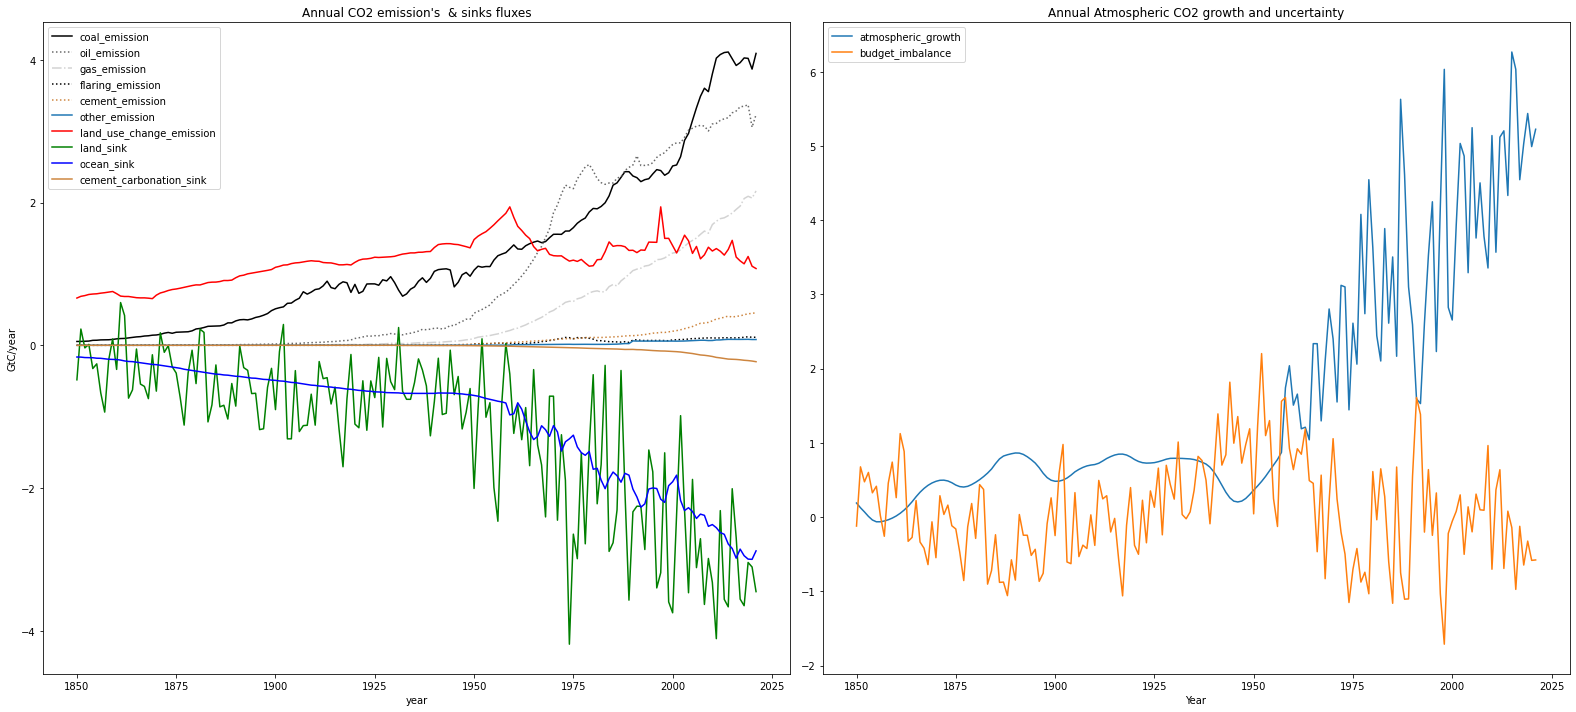

In [ ]:
# check what we have imported
# --------------Visual inspection--------------# 
fig, (ax1, ax2) = plt.subplots(1, 2)

#plotting the CO2 emission's  & sinks fluxes
# emissions
plt.subplot(1,2,1)
df.coal_emission.plot(figsize=(22, 10),color='black',linestyle='-')
df.oil_emission.plot(color='dimgrey',linestyle=':')
df.gas_emission.plot(color='lightgrey',linestyle='-.')
df.flaring_emission.plot(color='black',linestyle=':')
df.cement_emission.plot(color='peru', linestyle=':')
df.other_emission.plot()
df.land_use_change_emission.plot( color='r')
# sinks
(df.land_sink*-1).plot(color='g')
(df.ocean_sink*-1).plot(color='b')
(df.cement_carbonation_sink*-1).plot(color='peru')

plt.legend()
plt.xlabel("year")
plt.ylabel("GtC/year")
plt.title("Annual CO2 emission's  & sinks fluxes")

#plotting the atmospheric growth and uncertainty
df.atmospheric_growth.plot(figsize=(22, 10),ax=ax2)
df.budget_imbalance.plot(ax=ax2)
plt.legend()
ax2.set_title("Annual Atmospheric CO2 growth and uncertainty")
ax2.legend()
fig.tight_layout()
plt.show()

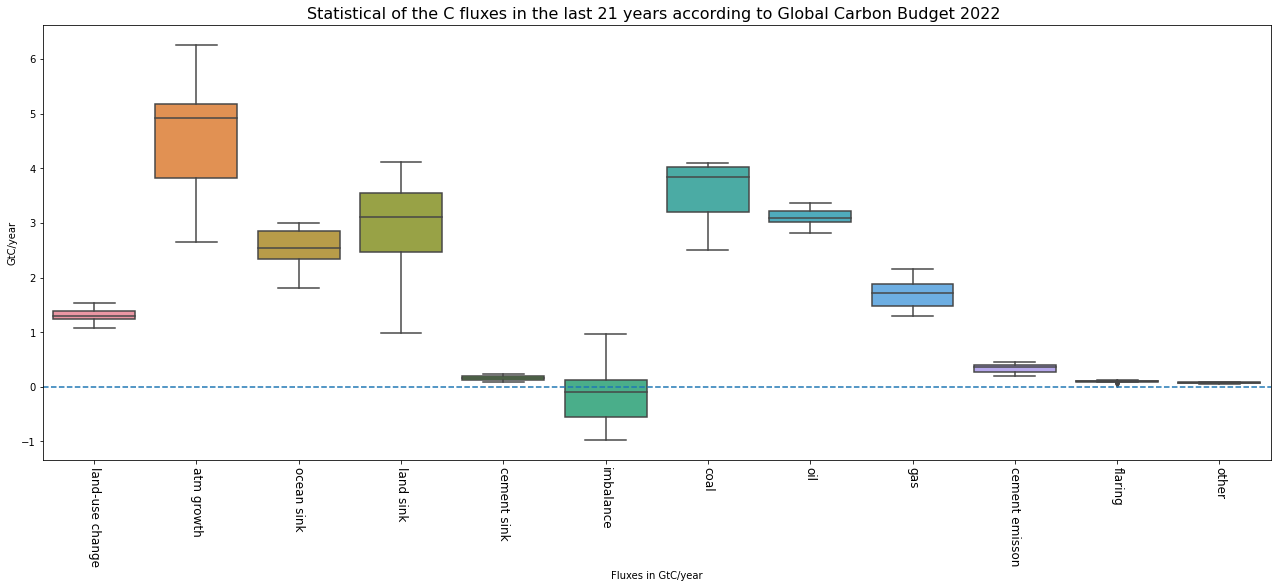

In [ ]:
# --------------Statistical inspection--------------# 
#df.describe()
plt.figure(figsize=(22,8))
boxplot3= sns.boxplot(data=df.iloc[150:,:])
boxplot3.set(xlabel='Fluxes in GtC/year',ylabel='GtC/year')
boxplot3.axes.set_title("Statistical of the C fluxes in the last 21 years according to Global Carbon Budget 2022 ", fontsize=16)
boxplot3.tick_params(axis='x', labelrotation=270)
boxplot3.set_xticklabels(['land-use change','atm growth','ocean sink','land sink','cement sink','imbalance','coal','oil','gas','cement emisson','flaring','other'], fontsize=12)
boxplot3.axhline(0, linestyle="dashed")
plt.show()

**Visualize the statistical data of the Carbon budget**


Here : https://youtu.be/RHU5A3IfDT4  

The plot begins with the whole data set from 1850 till 2021; then, it iterates to reproduce a boxplot for a shorter period. It ends with the fluxes in the last 21 years. The high variability in land Carbon sinks is apparent. The land sink grows faster than the ocean sink, and land-use changes emissions. In the next code line is the recipe for that visualization on YouTube.

In [ ]:
# visualization recipe
import imageio
images = []

for i in range(2):  # this number must be 150 for visualization of 150 year
  plt.figure(figsize=(22,13))
  boxplot= sns.boxplot(data=df.iloc[i:,:])
  boxplot.set(xlabel='Fluxes in GtC/year',ylabel='GtC/year')
  boxplot.axes.set_title(f"Statistical of Carbon fluxes in the last {172-i} years according to Global Carbon Budget 2022 ", fontsize=16)
  boxplot.tick_params(axis='x', labelrotation=270)
  boxplot.set_xticklabels(['land-use change','atm growth','ocean sink','land sink','cement sink','imbalance','coal','oil','gas','cement emisson','flaring','other'], fontsize=15)
  boxplot.axhline(0, linestyle="dashed")
  fig = boxplot.get_figure()  # get the figure from the sns object
  fig.savefig('saved.png')  # save it to the images list
  images.append(imageio.imread('saved.png'));
  plt.close() # don not draw the image
imageio.mimsave('movie.gif', images)

## Fractionations

In general,the fluxes have the d13C signature of its origin reservoir. Except three fluxes:

1- The flux from atmosphere to the biosphere because of the photosynthetic CO2 fixation **fractionation**. photosynthetis favor the lighter carbon isotope 12C which make the biosphere depleted in d13C (Brugnoli & Farquhar, 2000). The fractionation yields lower value in C3 vegetations like trees ~d13C=-25, than the fractionation in C4 vegetation like grasses and some crops ~ d13C=-13 (Ruddiman, W. F. ,2001). According to Battle et al (2000), the fractionation value is (-18 ‰). 

In this model I will use the value of =(atmospherics value-**weighted_terrestrial_fractionation (-16.5 ‰)**) as a value of the flux from atmosphere to biosphereas. The value of (-16.5 ‰) reported by Still et al. (2003) after considering **assimilation-weighted** terrestrial discrimination against 13CO2 for both C3 and C4 photosynthesis paths. 

2- The flux from air to the ocean. Battle et al.(2000) calculated the ocean kinetic fractionation as (-2.0 ± 1.0‰). I will use this value of (-2) in the model as a  parameter **fractionation_from_atmosphere_to_ocean**. Battle et al.(2000) took this estimation originally from both both (Siegenthaler & Münnich,1981; Rik Wanninkhof,1985). Rik Wanninkhof (1985) wrote: "*The experimental results give a fractionation of-2.4 ± 2.0‰ while the calculated value for invasion is-2.1 ± 0.3‰ (i.e. 13CO2 invading slower), The results show that the fractionation of CO2 during invasion into a hydroxide solution (-14‰) is clearly too high as a value for invasion into seawater and should no longer be used as an upper limit in CO2 models.*

3- The flux from ocean to air. Siegenthaler & Münnich (1981) " considered a value of *-9.7 to -10.2%  for ocean-to-atmosphere transfer*". I will use a value of -10  in this model. Rik Wanninkhof (1985) mentioned a value of ( from -0.7 to +1.6) but it was not pretty clear in his paper if this number for theis flux.


In [ ]:
weighted_terrestrial_fractionation = -16.5
fractionation_from_atmosphere_to_ocean = -2   # ocean kinetic fractionation
fractionation_from_ocean_to_atmosphere = -10

**Begin value of reservoirs sizes**

We know from Friedlingstein et al. (2022) the carbon reservoirs size for today (which are the final value in the model) and we know also the annual fluxes.  We calibrate the begin value in such way that final value must be the same as in the Friedlingstein et al. (2022) estimations. The final value must be:

* Atmsospher = **875** GtC

* Vegetation = **450** GtC. I will not consider the soil (1700 GtC) now in the system, so only green vegetations. 

* The upper ocean **3752.8** GtC which is 10% of the ocean's total carbon. Here I assumed that only 10% of the ocean mixed annually with the atmsopshere.
Please note that we summed up all three ocean  carbons:

    Dissolved inorganic carbon DIC = 37,000 GtC

    Marine biota = 3 GtC

    Organic carbon = 700 GtC
 please note that:

All units in this model in GtC/y for fluxes and  GtC for reservoirs

All calculations for (C) carbon mass only. It is not for CO2

In [ ]:
# --------------The reservoirs--------------#
atmosphere = np.array([602]) 
biosphere = np.array([444]) 
ocean = np.array([3577.9]) 

In [ ]:
# --------------The fluxes--------------#
# Fluxes data are from Friedlingstein et al. (2022)
# Biosphere fluxes
from_biosphere_to_Atmosphere = np.array(130 + df.land_use_change_emission)
from_Atmosphere_to_biosphere = np.array(130 + df.land_sink)
# Ocean fluxes
from_ocean_to_Atmosphere = np.repeat(80, 172)   # we repeat the same flux in all the loop of 172 year
from_Atmosphere_to_ocean = np.array(80 + df.ocean_sink )  

# fossil fuel fluxes
# Make numpy array from the columns to to facilitate the loop
# for emissions
coal_emission	= np.array(df.coal_emission)
gas_emission	= np.array(df.gas_emission)
oil_emission	= np.array(df.oil_emission)
cement_emission	= np.array(df.cement_emission)
flaring_emission	= np.array(df.flaring_emission)
other_emission	= np.array(df.other_emission)
# and for the carbonation_sink &  budget_imbalance
cement_carbonation_sink = np.array(df.cement_carbonation_sink)
budget_imbalance =    np.array(df.budget_imbalance)


**Begin value of reservoirs δ13C signature**


First, Estimation of today’s δ13C values of the three reservoirs of ocean, biosphere and atmosphere:

* The ocean Carbon has the value of **+1.8** according to figure 2 and 3 of Quay et al. (2003). Rik Wanninkhof (1985) reported a similar value of (1.5 ‰) for the ocean.  I assumed that the value of Dissolved Inorganic Carbon DIC is the representative value for all ocean’s carbon because the DIC is 53 times bigger than the OC and biota (Friedlingstein et al. 2022)

* The biomass δ13C values differ between C3 and C4 plants. I used the calculations of Still et al. 2003 that the simulated biomass values of C3 and C4 vegetation are 389.3 and 18.6 Pg C, respectively —>  95% of C3 and 5% for the C4. Assume that C3 value is -25 as in (Ruddiman, W. F. ,2001), and the value of the C4 is -13, then the result gives:
biomass_δ13C=  -25*0.95 - 13*0.05 =**-24.4 ‰**   Which is similar to the estimation of Global Monitoring Laboratory of -25

* The atmospheric value of (**-8.6 ‰**) is reported in from Scrippsco2 project south pole station 

Now we know today’s value from above, and the annual fluxes from the Global carbon Budget paper: We calibrate the beginning value in such a way that the final value must be the same as we estimate here above. Moreover, the comparison will be conducted for the atmospheric value to calibrate the model.

-all δ13C values in permill VPDB Pee Dee Belemnite standard 


In [ ]:
# -------------- δ13C values for the reservoirs--------------#
ocean_13C = np.array([2.5]) 
atmosphere_13C = np.array([-5.5])   
biosphere_13C = np.array([-22]) 

**Estimating Fluxes δ13C value**

In general, fossil fuel δ13C values differ per geological and sedimentation conditions beside the difference between the different fossil fuel types. In simple calculation, the Global Monitoring Laboratory  considers all fossil fuels to have the value of -28. In the next lines I will review the literature value for every fossil fuel :

* For Gas: In this model we will assign the value of (-44.5) to the Gas. It is a very rough estimation because: for example for Gas there are three main types (conventional gas, shale gas, and coal gas) beside the extraction and the geological layer that differ. The value of (-44.5) is an average of the natural gas/coal from page 13, table5  of Menoud et al. 2022. Others have lower values for gas like figure 7 from (Sherwood et al, 2017) who reported flux-weighted average of all sources produces a mean atmospheric δ13C CH4 of∼−53.6 ‰. whereas, (Sherwood et al, 2017) in page 7: calculated a mean value of -44.8 for gas (mean of all conventional, coal and shale gas), -61.7 gas from microbial sources, and -26.2 for biomass burning.
* The value of flaring assumed the same as the gas value
* The value of of  coal_13C (-24.1) and oil_13C (-30) are obtained from page 8 of ( Andres et al. 1994) 
* The value of cement_13C (0.3) obtained from page 9 of (Andres et al. 1994) 
* The value of other_13C (-26) is assumed to be the same as trees. The value of -26 for trees token from Global Monitoring Laboratory website

In [ ]:
# -------------- δ13C of the six fossil fluxes--------------#

gas_13C  = -44.5
flaring_13C = gas_13C

coal_13C = -24.1

oil_13C  = -30
cement_13C = 0.3
other_13C = -26 

# Check point
# The next line is just to run experimental model with high or low value of fossil fuel
# gas_13C = coal_13C = oil_13C = cement_13C = flaring_13C = other_13C = -120

In [ ]:
# A loop of 172 steps (years) will be made to estimate the change in the Carbon reservoirs size first 
for i in range(172):
  # every step will calculate the size change of all three reservoirs
  ocean = np.append(ocean, ocean[i] + from_Atmosphere_to_ocean[i] - from_ocean_to_Atmosphere[i] )
  atmosphere = np.append(atmosphere, atmosphere[i] - from_Atmosphere_to_ocean[i] + from_ocean_to_Atmosphere[i] +
                         from_biosphere_to_Atmosphere[i] - from_Atmosphere_to_biosphere[i] -
                         cement_carbonation_sink[i]- budget_imbalance[i]+
                          coal_emission[i]+ gas_emission[i]+ oil_emission[i]+ 
                         cement_emission[i]+ flaring_emission[i]+ other_emission[i]) 
  biosphere = np.append(biosphere, biosphere[i] - from_biosphere_to_Atmosphere[i] + from_Atmosphere_to_biosphere[i])


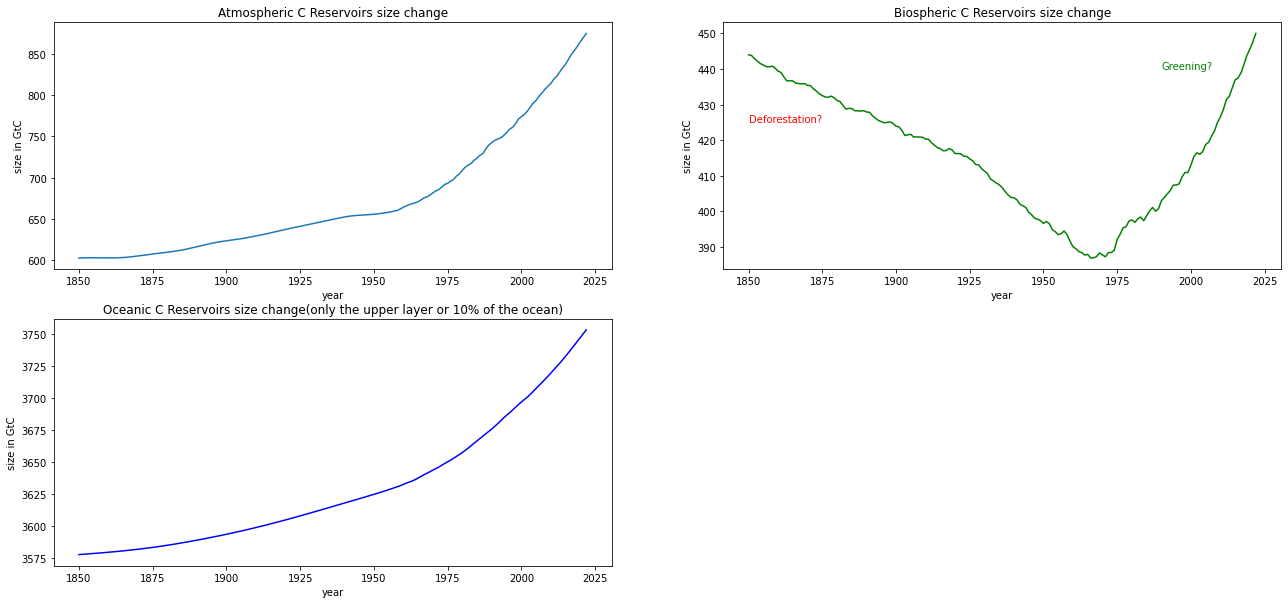

Atmospheric C Reservoirs size in the year 2021 according to the carbon budget paper is 875 GtC. My model yields value of  875 
 Biosphere C Reservoirs size in the year 2021 according to the carbon budget paper is 450 GtC. My model yields value of  450 
10% of the Oceanic C Reservoirs size in the year 2021 according to the carbon budget paper is 3752.8 GtC GtC. My model yields value of  3752.8


In [ ]:
# tussen stapje ter controle
# Plot the change in these three reservoirs in time  
fig, axs = plt.subplots(2, 2,figsize=(22, 10))


# first add extra one year to the time array because we forecasted a year in the last code
while len(time)==172:  # Add the year '2022' if you didn't added yet
  time = np.append(time,2022)

axs[0, 0].plot(time, atmosphere, label='atmosphere',)
axs[0, 0].set(xlabel= "year", ylabel= "size in GtC")
axs[0, 0].set_title("Atmospheric C Reservoirs size change")

axs[0, 1].plot(time,biosphere, label='biosphere', color='g')
axs[0, 1].set(xlabel= "year", ylabel= "size in GtC")
axs[0, 1].set_title("Biospheric C Reservoirs size change")
axs[0, 1].text(1850,425, "Deforestation?", color='r')
axs[0, 1].text(1990,440, "Greening?", color='g')

axs[1, 0].plot(time,ocean, label='ocean',color='b')
axs[1, 0].set(xlabel= "year", ylabel= "size in GtC")
axs[1, 0].set_title("Oceanic C Reservoirs size change(only the upper layer or 10% of the ocean)")

axs[1, 1].remove()
plt.show()


# check the reservoirs size in 2021 according to my model and compare it with the carbon budget estimation
print('Atmospheric C Reservoirs size in the year 2021 according to the carbon budget paper is 875 GtC. My model yields value of ',round(atmosphere[-1]),
      '\n','Biosphere C Reservoirs size in the year 2021 according to the carbon budget paper is 450 GtC. My model yields value of ',round(biosphere[-1]), '\n'
      '10% of the Oceanic C Reservoirs size in the year 2021 according to the carbon budget paper is 3752.8 GtC GtC. My model yields value of ',round(ocean[-1],1) )

The biosphere absorbs ~29**±8**% of our **ANNUAL** emission  **during the last decade** according to Keeling & Graven; 2021

However, the biosphere figure above, shows that this CO2 sink is just a restoration of the original reservoir size. We almost reached the 1850 reservoir capacity. Do we have any extra **capacity**? Can the biosphere accommodate more carbon without amplification of the wildfire risk? In the next lines I will try to answer this question in fast calculation


In [ ]:
greening= round(biosphere.max()- biosphere.min())
greening_percentage = round((greening/biosphere.min())*100)

print('The total greening of',np.where(biosphere== biosphere.max())[0]-np.where(biosphere== biosphere.min())[0] ,'years\
, from the seventies till today is ',greening,'GtC,\
 This is a', greening_percentage, '% increase in capacity' )

The total greening of [56] years, from the seventies till today is  63 GtC, This is a 16 % increase in capacity


**16%** increase in vegetation in the last 50 years according to the model must be an alarming issue for the model and the biosphere capacity. Suppose that the forest area is a third of the world's area; that will be an extra ~1.5 kilos of carbon in every single square meter of the forest.   

The vegetation **mass** increases in the model don't agree with other measurements and bookkeeping records in the short past or older past. The FAO data shows a decrease of 3.3% in the Forest **area** in the last thirty years.  

Hannah Ritchie and Max Roser (2021) indicate that The forest **area** was 22% bigger in 1850 than today. The Carbon Budget paper and this model are the same, which is anti-intuitive. 

In [ ]:
# back to the d13C

The balance equation for the atmosphere

δ13C X **new** atmosphere = (δ13C X **old** atmosphere)   +   (δ13C X fluxes)

With the **new** atmosphere I mean the atmosphere size in the next step

With **old** atmosphere I mean the atmosphere in the previous step


rearrange it

δ13C  = [(δ13C X old atmosphere)   +   (δ13C X flux)]    /  new  atmosphere




In [ ]:
for i in range(172):
  atmosphere_13C = np.append(atmosphere_13C, (atmosphere[i]*atmosphere_13C[i] - 
                                              #the atmospher-ocean fluxes
                                              from_Atmosphere_to_ocean[i] * (atmosphere_13C[i]+fractionation_from_atmosphere_to_ocean)  +\
                                              from_ocean_to_Atmosphere[i] * (ocean_13C[i]+fractionation_from_ocean_to_atmosphere) +\
                                               #the atmospher-biosphere fluxes
                                              from_biosphere_to_Atmosphere[i] * biosphere_13C[i] -\
                                              from_Atmosphere_to_biosphere[i] * (atmosphere_13C[i] + weighted_terrestrial_fractionation)  +\
                                               #other fluxes
                                              cement_carbonation_sink[i] *cement_13C- budget_imbalance[i]* atmosphere_13C[i]  +
                                               #the fossil fuel & cement emission fluxes
                                              coal_emission[i]*coal_13C+ gas_emission[i]*gas_13C+ oil_emission[i]*oil_13C+ 
                                              cement_emission[i]*cement_13C+ flaring_emission[i]*flaring_13C+ other_emission[i]*other_13C)/
                                              atmosphere[i+1] )

  biosphere_13C = np.append(biosphere_13C, (biosphere[i]* biosphere_13C[i] - 
                                            from_biosphere_to_Atmosphere[i] * biosphere_13C[i] + 
                                            from_Atmosphere_to_biosphere[i] *(atmosphere_13C[i] + weighted_terrestrial_fractionation) )/biosphere[i+1] )
  ocean_13C = np.append(ocean_13C,( ocean[i]* ocean_13C[i] +
                                   from_Atmosphere_to_ocean[i] *(atmosphere_13C[i]+fractionation_from_atmosphere_to_ocean) -
                                   from_ocean_to_Atmosphere[i] *(ocean_13C[i]+fractionation_from_ocean_to_atmosphere))/ocean[i+1])    
print('Last Atmosphere 13C value is ',atmosphere_13C[-1],'\n','Last Biosphere 13C value is  ',biosphere_13C[-1], '\n','Last Ocean 13C value is  ',ocean_13C[-1])             

Last Atmosphere 13C value is  -8.932821401343896 
 Last Biosphere 13C value is   -25.28046284740105 
 Last Ocean 13C value is   0.4116687427836146


In [ ]:
# importing Scrippsco2 atmosphere data
# I will compare the atmosphere model with these measurements

# importing the south pole measurments from Scrippsco2 project
url_south_pole_13C= 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/flask_isotopic/monthly/monthly_flask_c13_spo.csv'
south_pole_13C = pd.read_csv(url_south_pole_13C, skiprows=60, usecols=[3,4], index_col = [0])
south_pole_13C= south_pole_13C.astype(float)
south_pole_13C.dropna(inplace = True)
spo_time = south_pole_13C.index

# importing the Barrow_Alaska measurments from Scrippsco2 project
url_ptb_13C= 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/flask_isotopic/monthly/monthly_flask_c13_ptb.csv'
ptb_13C = pd.read_csv(url_ptb_13C, skiprows=60, usecols=[3,4], index_col = [0])
ptb_13C = ptb_13C.astype(float)
ptb_13C.dropna(inplace = True)
ptb_time = ptb_13C.index

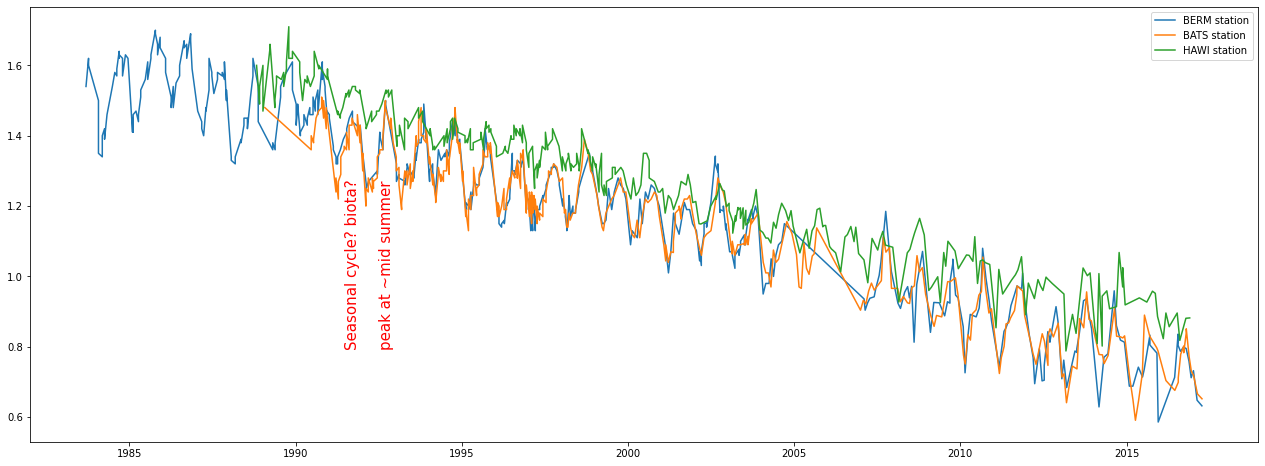

In [ ]:
# importing Scrippsco2 ocean data
# https://scrippsco2.ucsd.edu/data/seawater_carbon/ocean_time_series.html
# I will compare the ocean model with these measurements

# importing the  Hydrostation S (BERM)   measurments from Scrippsco2 project
# Hydrostation 'S' is located ~26 km southeast of the island of Bermuda (32°10'N, 64°30'W)
url_berm_13C= 'https://scrippsco2.ucsd.edu/assets/data/seawater/BERM.csv'
berm_13C = pd.read_csv(url_berm_13C, skiprows=35, usecols=[3,7], index_col = [0])
berm_13C = berm_13C.astype(float)
berm_13C.dropna(inplace = True)
berm_time = berm_13C.index

# importing the  Bermuda Atlantic Time-series Study (BATS) measurments from Scrippsco2 project
# BATS is located ~80 km southeast of Bermuda (31°50’N, 64°10’W)
url_bats_13C= 'https://scrippsco2.ucsd.edu/assets/data/seawater/BATS.csv'
bats_13C = pd.read_csv(url_bats_13C, skiprows=35, usecols=[3,7], index_col = [0])
bats_13C = bats_13C.astype(float)
bats_13C.dropna(inplace = True)
bats_time = bats_13C.index

# importing the  Hawaii Ocean Time-series Station ALOHA (HAWI)  measurments from Scrippsco2 project
# HOT station ALOHA is located in the North Pacific subtropical gyre ~100 km north of the island of ‘Oahu, Hawaii (22°45’N, 158°00’W).
url_hawi_13C= 'https://scrippsco2.ucsd.edu/assets/data/seawater/HAWI.csv'
hawi_13C = pd.read_csv(url_hawi_13C, skiprows=35, usecols=[3,7], index_col = [0])
hawi_13C = hawi_13C.astype(float)
hawi_13C.dropna(inplace = True)
hawi_time = hawi_13C.index

plt.figure(figsize=(22, 8))
plt.plot(berm_13C, label='BERM station')
plt.plot(bats_13C, label='BATS station')
plt.plot(hawi_13C, label='HAWI station')
plt.legend()
plt.text(1991.5, 0.8, "Seasonal cycle? biota?", color='r',rotation = 90, fontsize=15)
plt.text(1992.5, 0.8, "peak at ~mid summer", color='r',rotation = 90, fontsize=15)
plt.show()

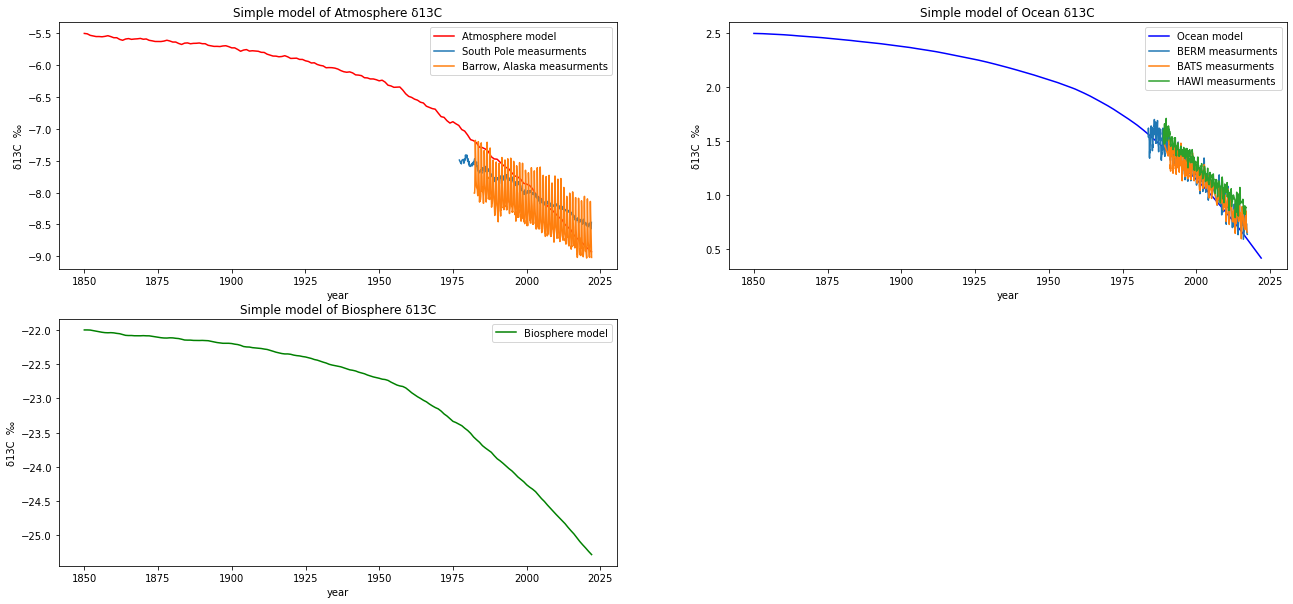

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(22, 10))

axs[0, 0].plot(time, atmosphere_13C, label='Atmosphere model',color='r')
axs[0, 0].plot(spo_time, south_pole_13C, label='South Pole measurments')
axs[0, 0].plot(ptb_time, ptb_13C, label='Barrow, Alaska measurments')
axs[0, 0].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[0, 0].set_title("Simple model of Atmosphere δ13C")
axs[0, 0].legend()

axs[0, 1].plot(time,ocean_13C, label='Ocean model',color='b')
axs[0, 1].plot(berm_time,berm_13C, label='BERM measurments')
axs[0, 1].plot(bats_time,bats_13C, label='BATS measurments')
axs[0, 1].plot(hawi_time,hawi_13C, label='HAWI measurments')
axs[0, 1].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[0, 1].set_title("Simple model of Ocean δ13C")
axs[0, 1].legend()

axs[1, 0].plot(time,biosphere_13C, label='Biosphere model',color='g')
axs[1, 0].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[1, 0].set_title("Simple model of Biosphere δ13C")
axs[1, 0].legend()

axs[1, 1].remove()
plt.show()

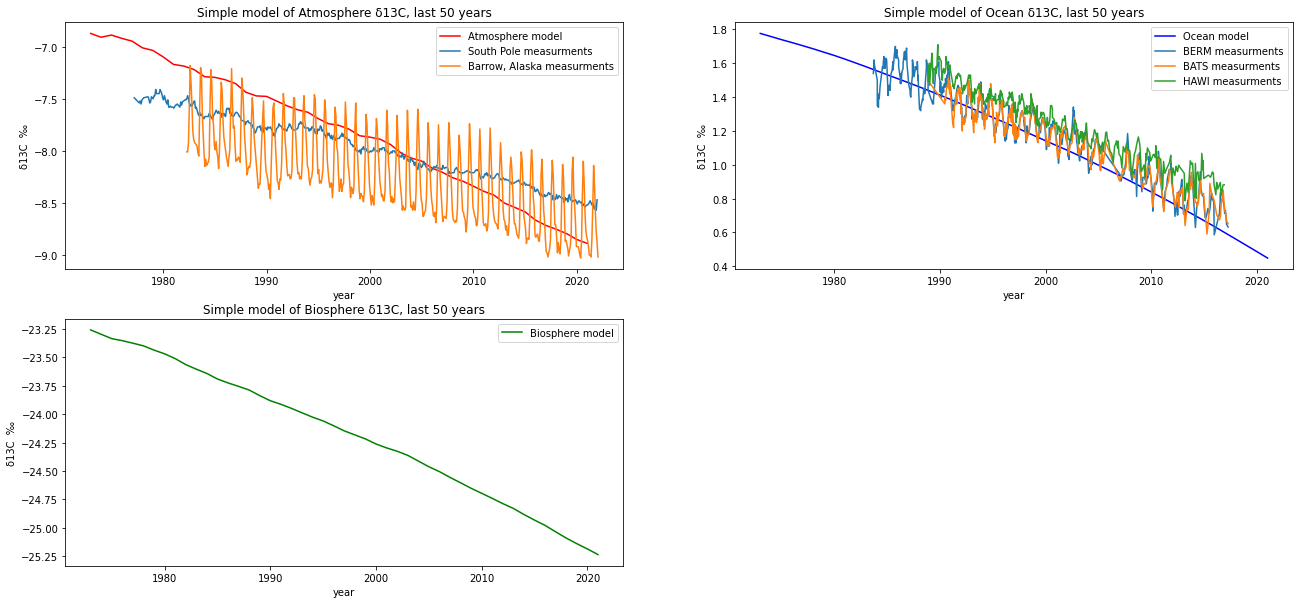

In [ ]:
# zoom to the last 50 years
fig, axs = plt.subplots(2, 2,figsize=(22, 10))

axs[0, 0].plot(time[-50:-1], atmosphere_13C[-50:-1], label='Atmosphere model',color='r')
axs[0, 0].plot(spo_time, south_pole_13C, label='South Pole measurments')
axs[0, 0].plot(ptb_time, ptb_13C, label='Barrow, Alaska measurments')
axs[0, 0].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[0, 0].set_title("Simple model of Atmosphere δ13C, last 50 years")
axs[0, 0].legend()

axs[0, 1].plot(time[-50:-1],ocean_13C[-50:-1], label='Ocean model',color='b')
axs[0, 1].plot(berm_time,berm_13C, label='BERM measurments')
axs[0, 1].plot(bats_time,bats_13C, label='BATS measurments')
axs[0, 1].plot(hawi_time,hawi_13C, label='HAWI measurments')
axs[0, 1].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[0, 1].set_title("Simple model of Ocean δ13C, last 50 years")
axs[0, 1].legend()

axs[1, 0].plot(time[-50:-1],biosphere_13C[-50:-1], label='Biosphere model',color='g')
axs[1, 0].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[1, 0].set_title("Simple model of Biosphere δ13C, last 50 years")
axs[1, 0].legend()

axs[1, 1].remove()
plt.show()

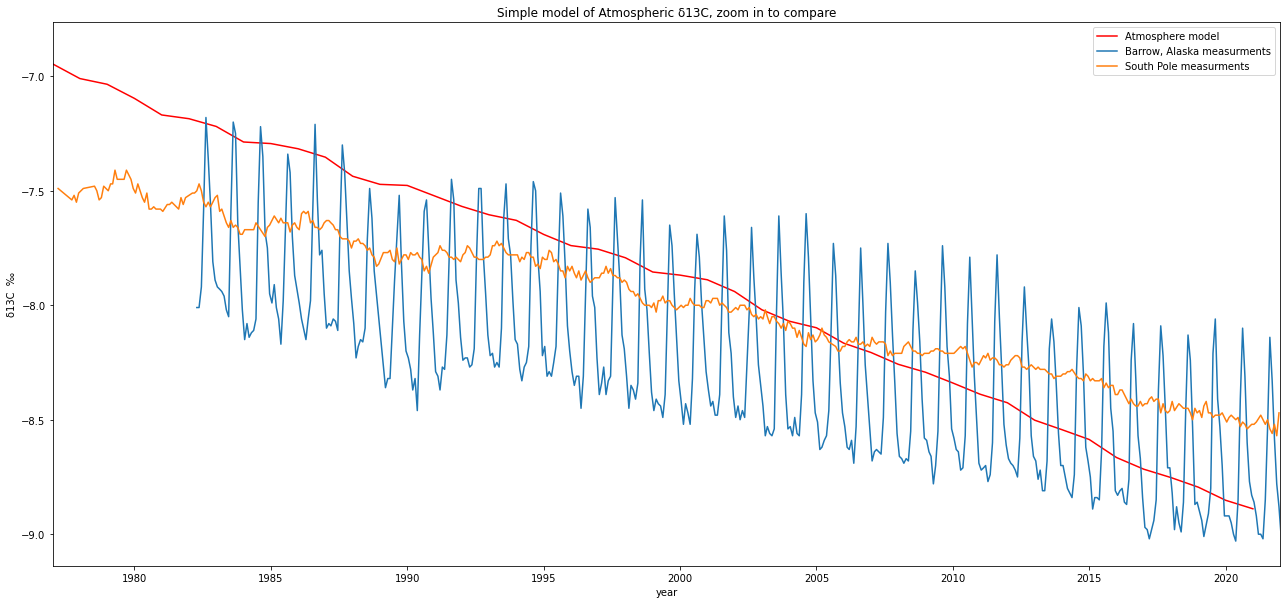

In [ ]:
# more zoom in Atmosphere

plt.figure(figsize=(22, 10))
plt.plot(time[-50:-1], atmosphere_13C[-50:-1], label='Atmosphere model',color='r')
plt.plot(ptb_time, ptb_13C, label='Barrow, Alaska measurments')
plt.plot(south_pole_13C, label='South Pole measurments')
#plt.plot(spo_time, spo_13C, label='South Pole measurments')
plt.xlabel("year")
plt.ylabel("δ13C  ‰")
plt.title("Simple model of Atmospheric δ13C, zoom in to compare")
plt.xlim(1977,2022)
plt.legend()
plt.show()

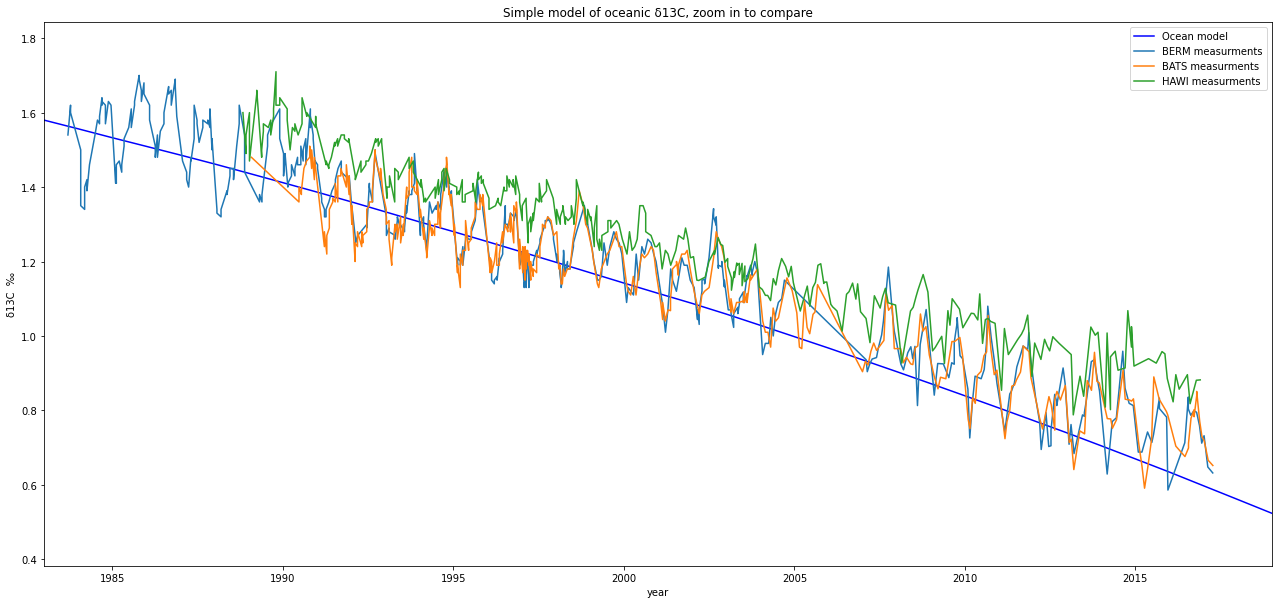

In [ ]:
# more zoom in ocean

plt.figure(figsize=(22, 10))
plt.plot(time[-50:-1],ocean_13C[-50:-1], label='Ocean model',color='b')
plt.plot(berm_time,berm_13C, label='BERM measurments')
plt.plot(bats_time,bats_13C, label='BATS measurments')
plt.plot(hawi_time,hawi_13C, label='HAWI measurments')
plt.xlabel("year")
plt.ylabel("δ13C  ‰")
plt.title("Simple model of oceanic δ13C, zoom in to compare")
plt.xlim(1983,2019)
plt.legend()
plt.show()


**Discussion of Points  need to be improved in the model:**




* There are six process determine CO2 exchange between atmosphere and ocean 

1- Air invasion to the water

2- Air diffusion from water.

3- precipitations: rain water wash the CO2 from atmosphere and as a result the rain water is between 5.0 and 5.5

4- Evaporation: when water evaporate it lose its CO2 to the atmosphere

5- Biota (planktonic) intake and decay which exchange CO2 between atmosphere and surface water

6- Biota (benthos) intake and decay which exchange CO2 between DIC and organic carbon



In this code I accounted for the first two only? 

* It will be a good idea to consider the change in the C3 and C4 vegeation in developing this model. The crops and the agriculture revolutions created anthropgenic landscape like the Corn Belt which is C4. Also the natural varability because the C4 plants vulnerablity for drought and El Niño in the tropics. 

* Natural weathering absorbs roughly 1.1 billion tons CO2 sink according to:
 https://www.pik-potsdam.de/en/news/latest-news/enhanced-weathering-of-rocks-can-help-to-suck-co2-out-of-the-air-2013-a-little but this is not in the Global Carbon Budget
Moreover, The atmospheric CO2 concentration has increased and the mining activities increased as well. 
 I would expect that these increases results in more CO2 in the weathering/sink?

 * There are other fluxes that mix with the atmospheric carbon with different  13C signatures like biomass burning or from wetland or from termite according to:  page 14 Etiope et al. 2008

 * I assumed that the ocean has only DIC but the ocean also has Organic Carbon OC and Biota which are both depleted from δ13C( figure 2 from Lamb et al. 2006). Furthermore the riverine OC input is highly depleted from δ13C. The latter flux is not in the model at all. 

* Using CO2 concentration is better to reconstruct the atmospheric Carbon reservoir size?

##References 

Andres, R. J., Marland, G. R. E. G. G., Boden, T., & Bischof, S. T. E. V. E. (1994). Carbon dioxide emissions from fossil fuel consumption and cement manufacture, 1751-1991; and an estimate of their isotopic composition and latitudinal distribution (No. CONF-9307181-4). Oak Ridge National Lab., TN (United States); Oak Ridge Inst. for Science and Education, TN (United States). https://www.osti.gov/servlets/purl/10185357 

<br>

Battle, M., Bender, M. L., Tans, P. P., White, J. W. C., Ellis, J. T., Conway, T., & Francey, R. J. (2000). Global carbon sinks and their variability inferred from atmospheric O2 and δ13C. Science, 287(5462), 2467-2470. https://www.science.org/doi/abs/10.1126/science.287.5462.2467

<br>

Brugnoli, E., & Farquhar, G. D. (2000). Photosynthetic fractionation of carbon isotopes. Photosynthesis: physiology and metabolism, 399-434.  https://link.springer.com/chapter/10.1007/0-306-48137-5_17

<br>


Etiope, G., Lassey, K. R., Klusman, R. W., & Boschi, E. (2008). Reappraisal of the fossil methane budget and related emission from geologic sources. Geophysical Research Letters, 35(9).https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2008GL033623 

<br>

FAO data retrieved on 9-3-2023 from https://data.worldbank.org/indicator/AG.LND.FRST.ZS   

<br>

Friedlingstein, P., O'sullivan, M., Jones, M. W., Andrew, R. M., Gregor, L., Hauck, J., ... & Zheng, B. (2022). Global carbon budget 2022. Earth System Science Data, 14(11), 4811-4900. https://essd.copernicus.org/articles/14/4811/2022/  https://essd.copernicus.org/articles/14/4811/2022/essd-14-4811-2022-f02-web.png   

<br>

Hannah Ritchie and Max Roser (2021) - "Forests and Deforestation". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/forests-and-deforestation' [Online retrieved on 9-3-2023]   

<br>

Keeling, R. F., & Graven, H. D. (2021). Insights from time series of atmospheric carbon dioxide and related tracers. Annual Review of Environment and Resources, 46, 85-110. https://doi.org/10.1146/annurev-environ-012220-125406    

<br>

Global Monitoring Laboratory https://gml.noaa.gov/ccgg/isotopes/c13tellsus.html retrieved 6-3-2023

<br>

Lamb, A. L., Wilson, G. P., & Leng, M. J. (2006). A review of coastal palaeoclimate and relative sea-level reconstructions using δ13C and C/N ratios in organic material. Earth-Science Reviews, 75(1-4), 29-57. http://dx.doi.org/10.1016/j.earscirev.2005.10.003   

<br>

Menoud, M., Van Der Veen, C., Lowry, D., Fernandez, J. M., Bakkaloglu, S., France, J. L., ... & Röckmann, T. (2022). New contributions of measurements in Europe to the global inventory of the stable isotopic composition of methane. Earth System Science Data, 14(9), 4365-4386. https://essd.copernicus.org/articles/14/4365/2022/essd-14-4365-2022.pdf 

<br>


Quay, P., Sonnerup, R., Westby, T., Stutsman, J., & McNichol, A. (2003). Changes in the 13C/12C of dissolved inorganic carbon in the ocean as a tracer of anthropogenic CO2 uptake. Global Biogeochemical Cycles, 17(1), 4-1. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2001GB001817 

<br>


Ruddiman, W. F. (2001). Earth's climate: past and future. Macmillan. figure 11-5

<br>

Scrippsco2 project https://scrippsco2.ucsd.edu/data/atmospheric_co2/sampling_stations.html . The data licensed under a CC BY license. It is live document **monthly updated**   *C. D. Keeling, S. C. Piper, R. B. Bacastow, M. Wahlen, T. P. Whorf, M. Heimann, and H. A. Meijer, Atmospheric CO2 and 13CO2 exchange with the terrestrial biosphere and oceans from 1978 to 2000: observations and carbon cycle implications, pages 83-113, in "A History of Atmospheric CO2 and its effects on Plants, Animals, and Ecosystems", editors, Ehleringer, J.R., T. E. Cerling, M. D. Dearing, Springer Verlag, New York, 2005.*

<br>

Sherwood, O. A., Schwietzke, S., Arling, V. A., & Etiope, G. (2017). Global inventory of gas geochemistry data from fossil fuel, microbial and burning sources, version 2017. Earth System Science Data, 9(2), 639-656. https://essd.copernicus.org/articles/9/639/2017/ 

<br>

Still, C. J., Berry, J. A., Collatz, G. J., & DeFries, R. S. (2003). Global distribution of C3 and C4 vegetation: carbon cycle implications. Global biogeochemical cycles, 17(1), 6-1. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2001GB001807

<br>

Siegenthaler, U., & Münnich, K. O. (1981). 12C/13C fractionation during CO2 transfer from air to sea. Carbon Cycle Modeling. https://scope.dge.carnegiescience.edu/SCOPE_16/SCOPE_16_1.5.05_Siegenthaler_249-257.pdf

<br>

Wanninkhof, R. I. K. (1985). Kinetic fractionation of the carbon isotopes 13C and 12C during transfer of CO2 from air to seawater. Tellus B: Chemical and Physical Meteorology, 37(3), 128-135.


##To do list:

Total 13c atoms in must = out  
I need to nullify the fluxes and the system must stay in equilibrium
